In [25]:
import sys
import os
import lxml.etree as ET 
import matplotlib.pyplot as plt

In [26]:
def getDataFromFileRRT(filePath: str) -> tuple:
    tree = ET.parse(filePath)
    root = tree.getroot()
    time = float(root.find('time').text)
    # countOfEdges = int(root.find('countofedges').text)
    pathFound = True if root.find('pathfound').text == 'true' else False
    distance = 0
    if pathFound: 
        distance = float(root.find('distance').text)
    return (pathFound, time, distance)
    

In [27]:
def getDataFromFileAstar(filePath: str) -> tuple:
    tree = ET.parse(filePath)
    root = tree.getroot()
    log = root.find('log')
    summary = log.find('summary')
    time = float(summary.get('time'))
    distance = float(summary.get('length'))
    path = log.find('path')
    pathFound = True
    if path.text == 'Path NOT found!':
        pathFound = False
    return (pathFound, time, distance)



In [28]:
def getAllData(folderRRT: str, folderAstar: str) -> tuple:
    RRTData = []
    RRTPathNotFound = []
    AstarPathNotFound = []
    for file in os.listdir(folderRRT):
        info = getDataFromFileRRT(os.path.join(folderRRT, file))
        if info[0]:
            RRTData.append((info[1], info[2]))
        else:
            RRTPathNotFound.append(file)
    AstarData = []
    for file in os.listdir(folderAstar):
        info = getDataFromFileAstar(os.path.join(folderAstar, file))
        if info[0]:
            AstarData.append((info[1], info[2]))
        else:
            AstarPathNotFound.append(file)
    if len(RRTPathNotFound) != 0:
        print(f'RRT path not found:', *RRTPathNotFound)
    if len(AstarPathNotFound) != 0:
        print(f'Astar path not found:', *AstarPathNotFound)
    return (RRTData, AstarData)

In [29]:
def drawData(data: list):
    dataRRT = data[0]
    dataAstar = data[1]
    timeRRT = [e[0] for e in dataRRT]
    timeAstar = [e[0] for e in dataAstar]
    distanceRRT = [e[1] for e in dataRRT]
    distanceAstar = [e[1] for e in dataAstar]
    print('Time:')
    width = 1
    fig, ax = plt.subplots()
    rects1 = ax.bar([(float(i) - width) for i in range(1, len(timeRRT) + 1)], timeRRT, width=width / 2, facecolor='#9999ff', label='RRT')
    rects2 = ax.bar([(float(i) - width / 2) for i in range(1, len(timeAstar) + 1)], timeAstar, width=width / 2, facecolor='#ff9999', label='A*')
    ax.set_ylabel('Time in seconds')
    ax.set_title('Time')
    ax.set_xlabel('Tasks')
    ax.set_xlabel('Tasks')
    ax.set_xticklabels([])
    ax.legend()
    fig.tight_layout()
    plt.show()
    print(f'Average running time RRT: {sum(timeRRT) / len(timeRRT)}.')
    print(f'Median time RRT: {sorted(timeRRT)[len(timeRRT) // 2] if len(timeRRT) % 2 == 0 else (sorted(timeRRT)[len(timeRRT) // 2] + sorted(timeRRT)[len(timeRRT) // 2 + 1]) / 2}')
    print(f'Average running time Astar: {sum(timeAstar) / len(timeAstar)}.')
    print(f'Median time Astar: {sorted(timeAstar)[len(timeAstar) // 2] if len(timeAstar) % 2 == 0 else (sorted(timeAstar)[len(timeAstar) // 2] + sorted(timeAstar)[len(timeAstar) // 2 + 1]) / 2}')
    print()
    print('Distance:')
    width = 1
    fig, ax = plt.subplots()
    rects1 = ax.bar([(i - width) for i in range(1, len(distanceRRT) + 1)], distanceRRT, width=width / 2, facecolor='#9999ff', label='RRT')
    rects2 = ax.bar([(i - width / 2) for i in range(1, len(distanceAstar) + 1)], distanceAstar, width=width / 2, facecolor='#ff9999', label='A*')
    ax.set_ylabel('Distance')
    ax.set_title('Distance')
    ax.set_xlabel('Tasks')
    ax.set_xticklabels([])
    ax.legend()
    fig.tight_layout()
    plt.show()
    print(f'Average distance RRT: {sum(distanceRRT) / len(distanceRRT)}.')
    print(f'Median distance RRT: {sorted(distanceRRT)[len(distanceRRT) // 2] if len(distanceRRT) % 2 == 0 else (sorted(distanceRRT)[len(distanceRRT) // 2] + sorted(distanceRRT)[len(distanceRRT) // 2 + 1]) / 2}')
    print(f'Average distance Astar: {sum(distanceAstar) / len(distanceAstar)}.')
    print(f'Median distance Astar: {sorted(distanceAstar)[len(distanceAstar) // 2] if len(distanceAstar) % 2 == 0 else (sorted(distanceAstar)[len(distanceAstar) // 2] + sorted(distanceAstar)[len(distanceAstar) // 2 + 1]) / 2}')


In [59]:
def drawDataPerc(data: list):
    dataRRT = data[0]
    dataAstar = data[1]
    timeRRT = [e[0] for e in dataRRT]
    timeAstar = [e[0] for e in dataAstar]
    distanceRRT = [e[1] for e in dataRRT]
    distanceAstar = [e[1] for e in dataAstar]
    print('Time:')
    width = 1
    fig, ax = plt.subplots()
    l = []
    for i in range(len(timeRRT)):
        l.append((timeRRT[i] / timeAstar[i]) * 100)
    rects1 = ax.bar([(float(i) - width) for i in range(1, len(timeRRT) + 1)], l, width=width - 0.2, facecolor='#9999ff', label='RRT')
    ax.set_title('Time')
    ax.set_xlabel('Tasks')
    ax.set_ylabel('RRT time relative to A * as a percentage')
    ax.axline((0, 100), (1, 100))
    ax.set_xticklabels([])
    ax.legend()
    fig.tight_layout()
    plt.show()
    print(f'Average running time RRT: {sum(timeRRT) / len(timeRRT)}.')
    print(f'Median time RRT: {sorted(timeRRT)[len(timeRRT) // 2] if len(timeRRT) % 2 == 0 else (sorted(timeRRT)[len(timeRRT) // 2] + sorted(timeRRT)[len(timeRRT) // 2 + 1]) / 2}')
    print(f'Average running time Astar: {sum(timeAstar) / len(timeAstar)}.')
    print(f'Median time Astar: {sorted(timeAstar)[len(timeAstar) // 2] if len(timeAstar) % 2 == 0 else (sorted(timeAstar)[len(timeAstar) // 2] + sorted(timeAstar)[len(timeAstar) // 2 + 1]) / 2}')
    print()
    print('Distance:')
    width = 1
    fig, ax = plt.subplots()
    l = []
    for i in range(len(distanceRRT)):
        l.append((distanceRRT[i] / distanceAstar[i]) * 100)
    rects1 = ax.bar([(float(i) - width) for i in range(1, len(distanceRRT) + 1)], l, width=width - 0.2, facecolor='#9999ff', label='RRT')
    ax.set_ylabel('RRT distance relative to A* as a percentage')
    ax.set_title('Distance')
    ax.set_xlabel('Tasks')
    ax.axline((0, 100), (1, 100))
    ax.set_xticklabels([])
    ax.legend()
    fig.tight_layout()
    plt.show()
    print(f'Average distance RRT: {sum(distanceRRT) / len(distanceRRT)}.')
    print(f'Median distance RRT: {sorted(distanceRRT)[len(distanceRRT) // 2] if len(distanceRRT) % 2 == 0 else (sorted(distanceRRT)[len(distanceRRT) // 2] + sorted(distanceRRT)[len(distanceRRT) // 2 + 1]) / 2}')
    print(f'Average distance Astar: {sum(distanceAstar) / len(distanceAstar)}.')
    print(f'Median distance Astar: {sorted(distanceAstar)[len(distanceAstar) // 2] if len(distanceAstar) % 2 == 0 else (sorted(distanceAstar)[len(distanceAstar) // 2] + sorted(distanceAstar)[len(distanceAstar) // 2 + 1]) / 2}')


# Moscow102401

Time:


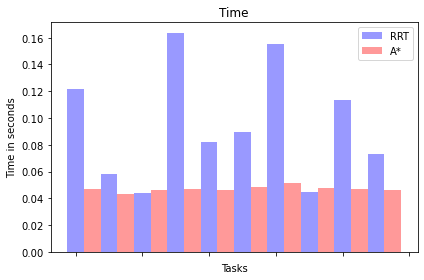

Average running time RRT: 0.09459730000000001.
Median time RRT: 0.089398
Average running time Astar: 0.0470476.
Median time Astar: 0.046911

Distance:


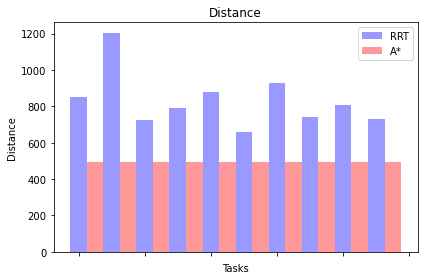

Average distance RRT: 831.113601.
Median distance RRT: 807.441223
Average distance Astar: 492.78887999999995.
Median distance Astar: 492.78888


In [43]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/moscow102401'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)



# Moscow102402

Time:


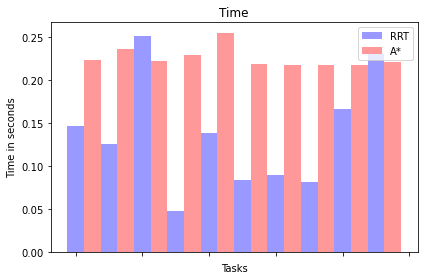

Average running time RRT: 0.135981.
Median time RRT: 0.138078
Average running time Astar: 0.2259427.
Median time Astar: 0.222107

Distance:


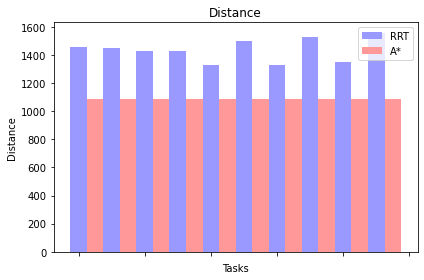

Average distance RRT: 1435.5002657.
Median distance RRT: 1449.418035
Average distance Astar: 1085.5453999999997.
Median distance Astar: 1085.5454


In [44]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/moscow102402'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# brc100d1

Time:


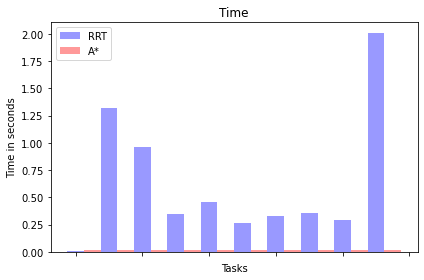

Average running time RRT: 0.6343399999999999.
Median time RRT: 0.357994
Average running time Astar: 0.0198634.
Median time Astar: 0.019837

Distance:


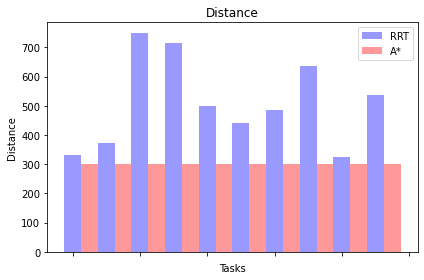

Average distance RRT: 508.4171670999999.
Median distance RRT: 497.910485
Average distance Astar: 299.04876999999993.
Median distance Astar: 299.04877


In [45]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/brc100d1'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# brc201d1

Time:


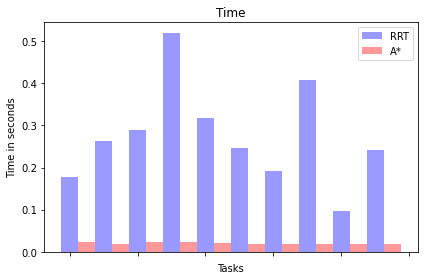

Average running time RRT: 0.2750873.
Median time RRT: 0.261863
Average running time Astar: 0.0203219.
Median time Astar: 0.01933

Distance:


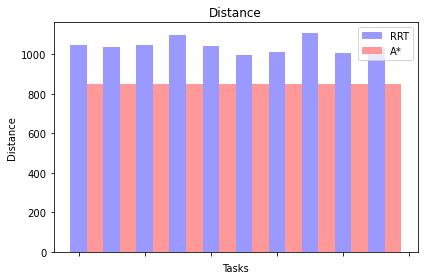

Average distance RRT: 1043.4366592000001.
Median distance RRT: 1044.117975
Average distance Astar: 851.5828199999999.
Median distance Astar: 851.58282


In [46]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/brc201d1'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# harvestmoon1

Time:


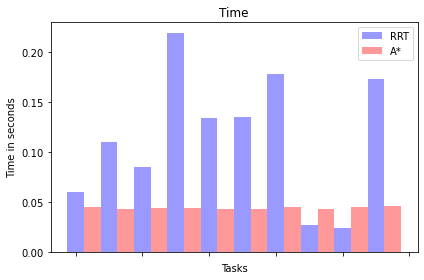

Average running time RRT: 0.11450149999999999.
Median time RRT: 0.134544
Average running time Astar: 0.044060600000000005.
Median time Astar: 0.044001

Distance:


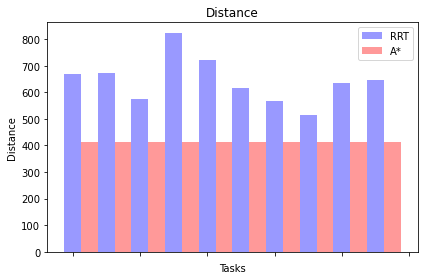

Average distance RRT: 644.0756248.
Median distance RRT: 647.652706
Average distance Astar: 411.51175.
Median distance Astar: 411.51175


In [47]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/harvestmoon1'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# Sydney102411

Time:


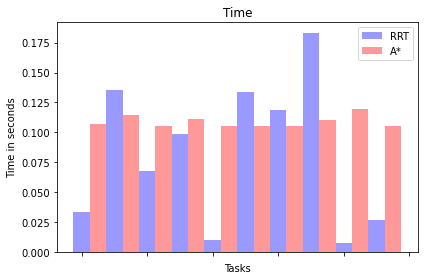

Average running time RRT: 0.08142859999999999.
Median time RRT: 0.098955
Average running time Astar: 0.1090338.
Median time Astar: 0.107306

Distance:


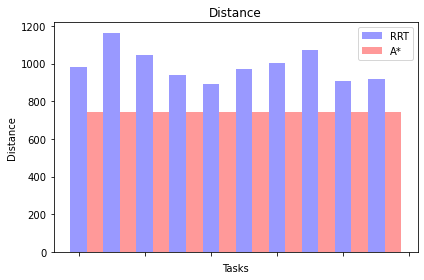

Average distance RRT: 989.4387299000002.
Median distance RRT: 980.0
Average distance Astar: 744.50464.
Median distance Astar: 744.50464


In [48]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/sydney102411'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# London102411

Time:


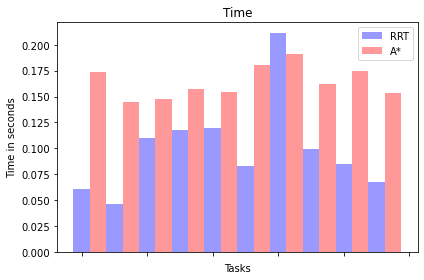

Average running time RRT: 0.09996479999999999.
Median time RRT: 0.099039
Average running time Astar: 0.1639835.
Median time Astar: 0.161643

Distance:


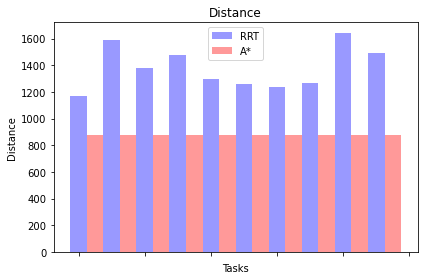

Average distance RRT: 1382.0271964.
Median distance RRT: 1380.0
Average distance Astar: 874.0092200000001.
Median distance Astar: 874.00922


In [49]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/london102411'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

Time:


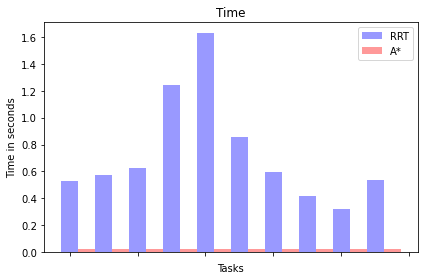

Average running time RRT: 0.7305988999999999.
Median time RRT: 0.594252
Average running time Astar: 0.0188061.
Median time Astar: 0.018686

Distance:


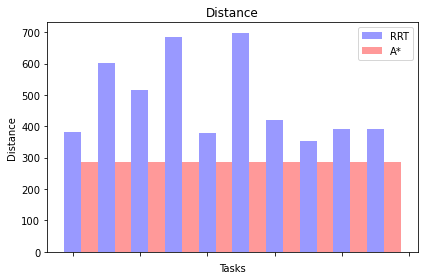

Average distance RRT: 481.48877710000005.
Median distance RRT: 420.973643
Average distance Astar: 285.19092.
Median distance Astar: 285.19092


In [50]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/random5122001'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# hrt201d1

Time:


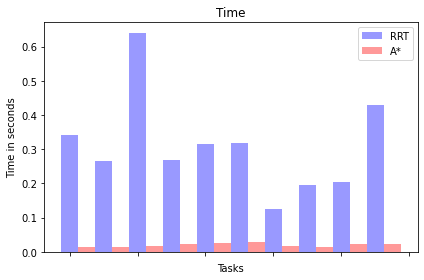

Average running time RRT: 0.31019319999999995.
Median time RRT: 0.315634
Average running time Astar: 0.0197759.
Median time Astar: 0.021561

Distance:


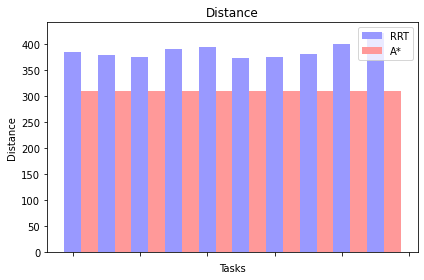

Average distance RRT: 386.8498869.
Median distance RRT: 383.538905
Average distance Astar: 309.71068999999994.
Median distance Astar: 309.71069


In [51]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/hrt201d1'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# Moscow102421

Time:


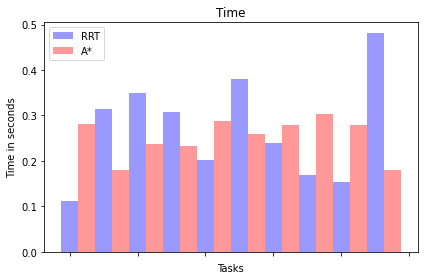

Average running time RRT: 0.27105630000000003.
Median time RRT: 0.306852
Average running time Astar: 0.25196589999999996.
Median time Astar: 0.27823

Distance:


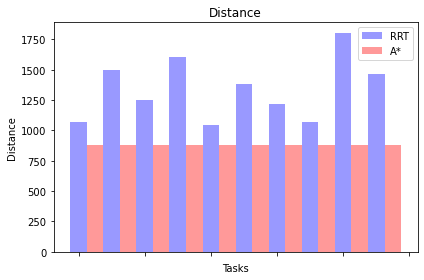

Average distance RRT: 1341.2017799.
Median distance RRT: 1384.58687
Average distance Astar: 880.3523600000001.
Median distance Astar: 880.35236


In [52]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/moscow102421'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# Milan102401

Time:


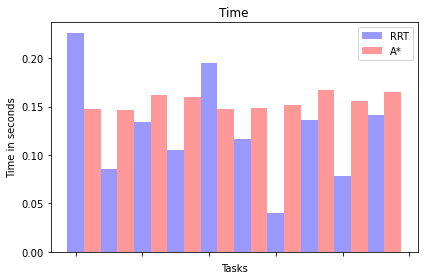

Average running time RRT: 0.1257296.
Median time RRT: 0.134159
Average running time Astar: 0.1551295.
Median time Astar: 0.155934

Distance:


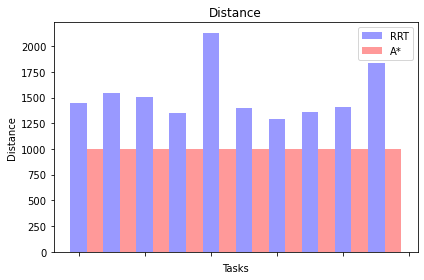

Average distance RRT: 1525.1894601000001.
Median distance RRT: 1444.888251
Average distance Astar: 999.35028.
Median distance Astar: 999.35028


In [53]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/milan102401'
pathRRT = os.path.join(path, 'RRT')
pathAstar = os.path.join(path, 'Astar')
data = getAllData(pathRRT, pathAstar)
drawData(data)

# Moscow102401 100 tasks

RRT path not found: Moscow_0_1024_rrt_log_13.xml Moscow_0_1024_rrt_log_42.xml Moscow_0_1024_rrt_log_85.xml
Astar path not found: Moscow_0_1024_astar_log_13.xml Moscow_0_1024_astar_log_42.xml Moscow_0_1024_astar_log_85.xml
Time:


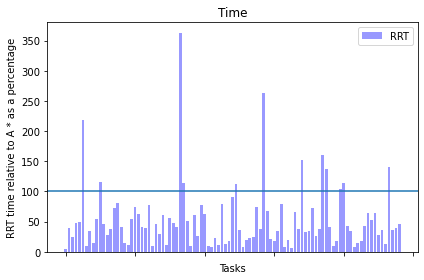

Average running time RRT: 0.08402813402061855.
Median time RRT: 0.0571125
Average running time Astar: 0.1637058556701031.
Median time Astar: 0.15049200000000001

Distance:


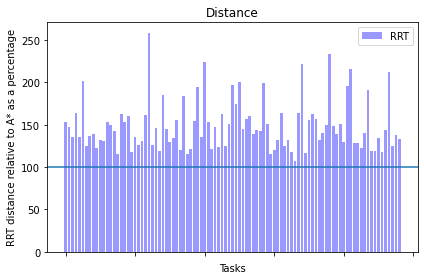

Average distance RRT: 1223.8664676701035.
Median distance RRT: 1176.6076345000001
Average distance Astar: 830.8555835051543.
Median distance Astar: 826.4880049999999


In [60]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/moscow102401'
pathRRT = os.path.join(path, 'RRToutput')
pathAstar = os.path.join(path, 'Astaroutput')
data = getAllData(pathRRT, pathAstar)
drawDataPerc(data)

# hrt201d 100 tasks

Time:


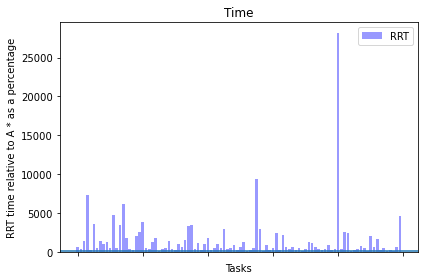

Average running time RRT: 0.13679291000000007.
Median time RRT: 0.06761
Average running time Astar: 0.011051989999999996.
Median time Astar: 0.009416

Distance:


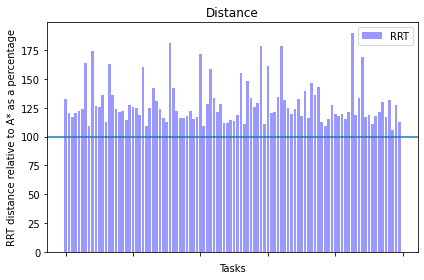

Average distance RRT: 332.2755644299999.
Median distance RRT: 325.0
Average distance Astar: 259.9350154.
Median distance Astar: 247.2254


In [61]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/hrt201d1'
pathRRT = os.path.join(path, 'RRToutput')
pathAstar = os.path.join(path, 'Astaroutput')
data = getAllData(pathRRT, pathAstar)
drawDataPerc(data)

# brc100d 100 tasks

Time:


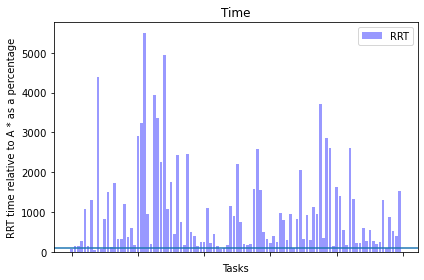

Average running time RRT: 0.15520914.
Median time RRT: 0.083275
Average running time Astar: 0.01742983.
Median time Astar: 0.015952

Distance:


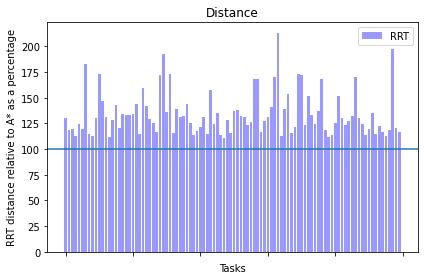

Average distance RRT: 498.6503121600001.
Median distance RRT: 489.0
Average distance Astar: 371.9891162000001.
Median distance Astar: 370.64676


In [62]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/brc100d1'
pathRRT = os.path.join(path, 'RRToutput')
pathAstar = os.path.join(path, 'Astaroutput')
data = getAllData(pathRRT, pathAstar)
drawDataPerc(data)

# mymap 100 tasks

Time:


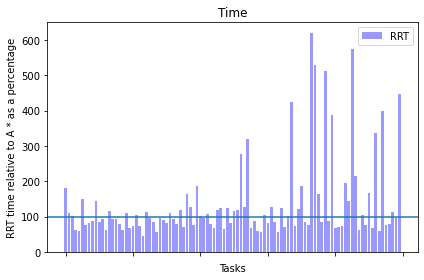

Average running time RRT: 0.21787781999999997.
Median time RRT: 0.149875
Average running time Astar: 0.1647680400000001.
Median time Astar: 0.16605

Distance:


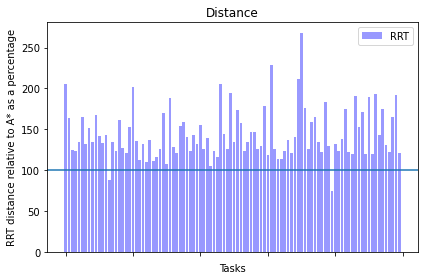

Average distance RRT: 1145.27281441.
Median distance RRT: 1113.98973
Average distance Astar: 796.3033099999999.
Median distance Astar: 813.24475


In [65]:
path = 'D:/Projects/PathPlanningAlgorithms-RRT-RRTstar-/tests/analysis/mymap'
pathRRT = os.path.join(path, 'RRToutput')
pathAstar = os.path.join(path, 'Astaroutput')
data = getAllData(pathRRT, pathAstar)
drawDataPerc(data)